<a href="https://colab.research.google.com/github/aknsntn/visualisation/blob/main/Hypheses_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart diseases

1.   `HeartDisease`: Responders that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). (Yes / No)

2. `BMI`: Body Mass Index

3. `Smoking`: Responders that have smoked at least 100 ciagrettes in their lives (Yes / No)

4. `AlcoholDrinking`: Adult men having more than 14 drinks per week and adult women having more than 7 drinks per week (Yes / No)

5. `Stroke`: Repsonders that have had a stroke (Yes / No)

6. `PhysicalHealth`: How many days during the last 30 days were the responders' physical health not good? (0-30 days)

6. `MentalHealth`: How many days during the last 30 days was the responders' mental health not good? (0-30 days)

7. `DiffWalking`: Responders have serious difficulty walking or climbing stairs? (Yes / No)

8. `Sex`: Female or Male

9. `AgeCategory`: 13 age groups: '18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'

10. `Race`: 7 race groups: 'White', 'Black', 'Asian', 'American Indian/Alaskan Native','Other', 'Hispanic'

11. `Diabetic`: Responders' status of diabetes: 'Yes','No'','No, borderline diabetes', 'Yes (during pregnancy)'

12. `PhysicalActivity`: Responders that reported doing physical activity or exercise during the last 30 days other than their regular job. (Yes / No)

13. `GenHealth`: Responders' evaluation their own health by 5 categories: 'Poor','Fair','Good','Very good','Excellent'

14. `SleepTime`: On average, how many hours of sleep do the responders get in a 24-hour period

15. `Asthma`: Responders that have had asthma? (Yes / No)

16. `KidneyDisease`: Responders that have had kiney disease except kidney stones, bladder infection, or incontinence (Yes / No)

17. `SkinCancer`: Responders that have had skin cancer? (Yes / No)


In [ ]:
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Warning message in install.packages("ggcorrplot"):
“installation of package ‘Rcpp’ had non-zero exit status”
Warning message in install.packages("ggcorrplot"):
“installation of package ‘plyr’ had non-zero exit status”
Warning message in install.packages("ggcorrplot"):
“installation of package ‘reshape2’ had non-zero exit status”
Warning message in install.packages("ggcorrplot"):
“installation of package ‘ggcorrplot’ had non-zero exit status”


In [ ]:
library(tidyverse)
library(repr)
library(ggplot2)
library(ggcorrplot)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: ignored

In [ ]:
options(repr.plot.width=12, repr.plot.height=12)

In [ ]:
df <- read_csv('heart_2020_cleaned.csv')
df <- drop_na(df)

In [ ]:
# df <- df[sample(nrow(df), 20000, replace = FALSE, prob = NULL),]

In [ ]:
head(df, 5)

HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


#### Больше всего людей, имеющих пороки сердца, находятся в категории 60+

In [ ]:
heart_disease <- df[(df["HeartDisease"] == "Yes"),]

In [ ]:
hd_age <- as.data.frame(table(heart_disease['AgeCategory']))

In [ ]:
hd_age

Var1,Freq
<fct>,<int>
18-24,130
25-29,133
30-34,226
35-39,296
40-44,486
45-49,744
50-54,1383
55-59,2202
60-64,3327


In [ ]:
sixty <- tail(hd_age, 5)

In [ ]:
Freq <- sum(sixty["Freq"])
Var1 <- "60+"

In [ ]:
sixty <- data.frame(Var1, Freq)

In [ ]:
less <- head(hd_age, 8)

In [ ]:
Freq <- sum(less["Freq"])
Var1 <- "18-59"

In [ ]:
less <- data.frame(Var1, Freq)

In [ ]:
to_plot <- rbind(less, sixty)

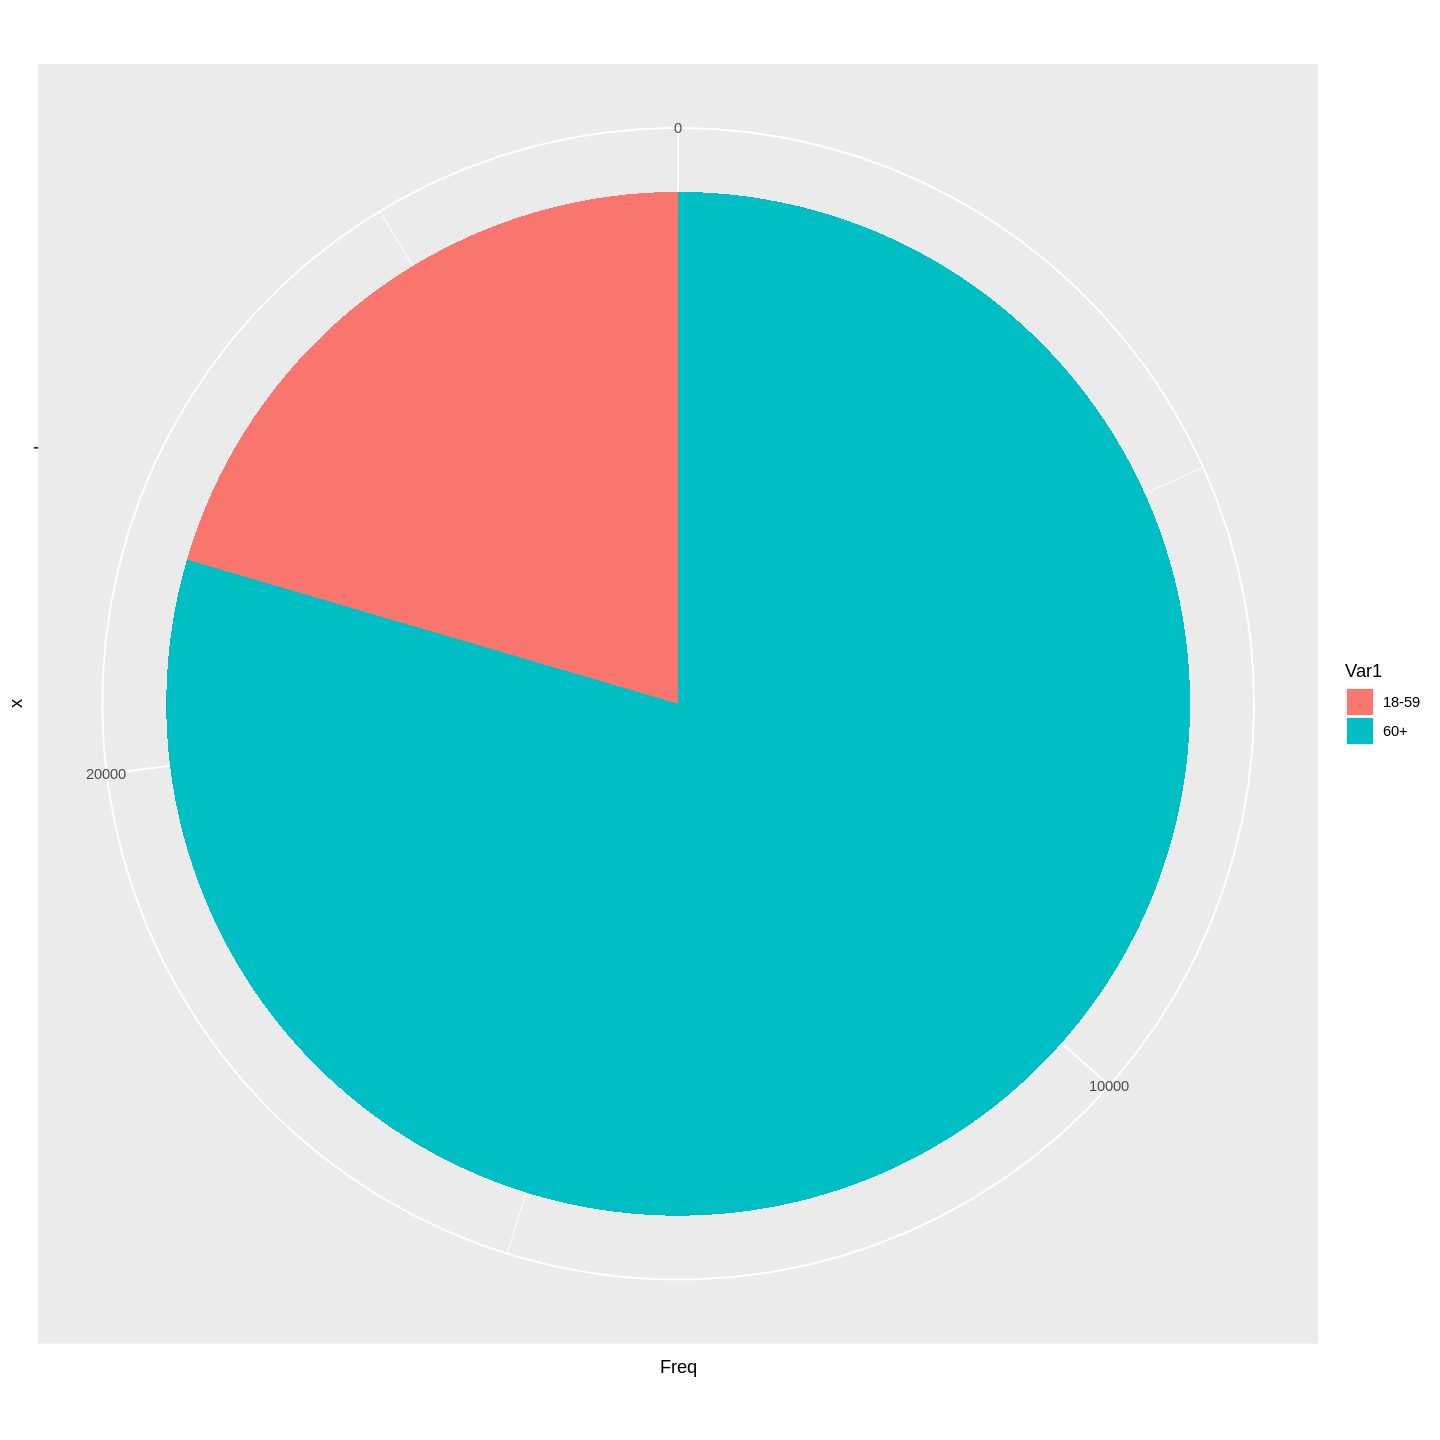

In [ ]:
ggplot(to_plot, aes(x="", y=Freq, fill=Var1)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)

Гипотеза подтвердилась: людей с пороком сердца в возрасте 60+ оказалось больше, чем в возрастном диапазоне 18-59.

 #### Параметры `PhysicalHealth` и `MentalHealth` связаны между собой

In [ ]:
m_n_p <- df[c("PhysicalHealth", "MentalHealth")]

In [ ]:
m_n_p

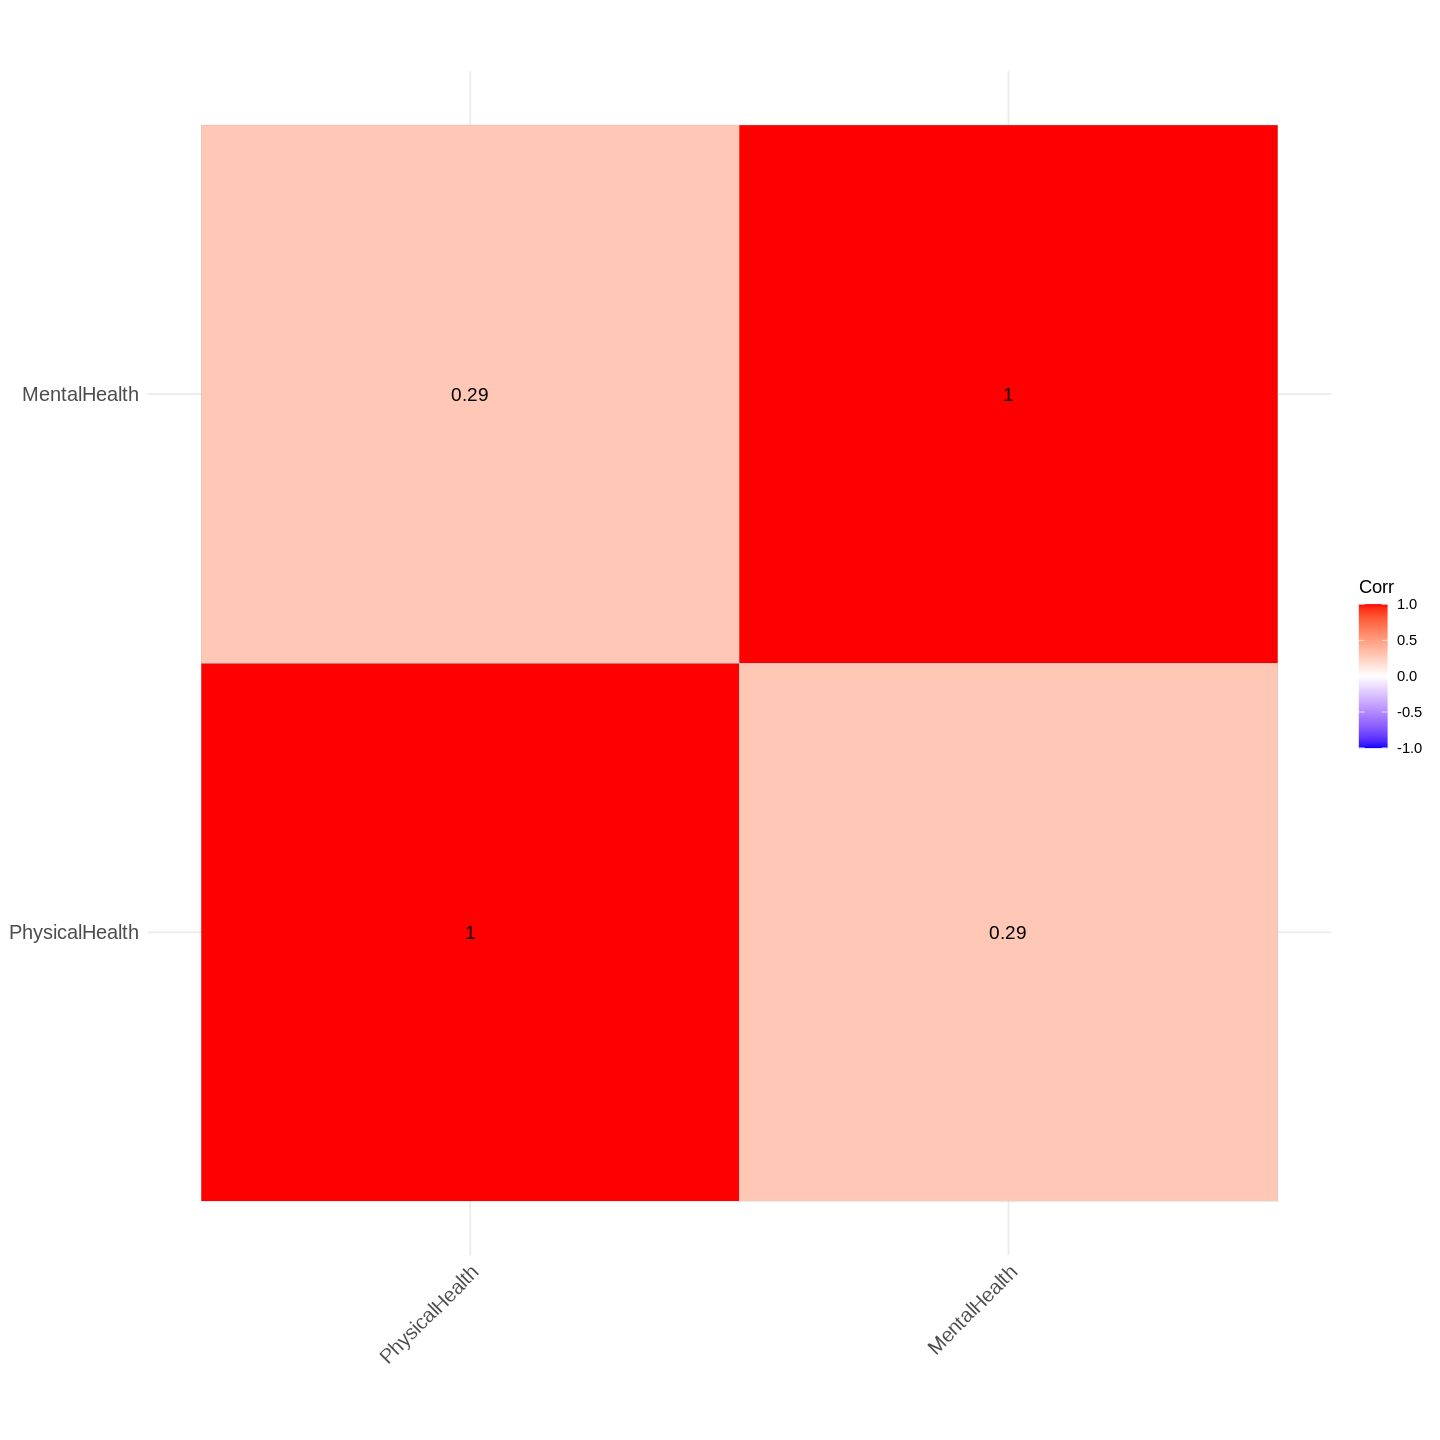

In [ ]:
ggcorrplot(cor(m_n_p), lab = TRUE)

Гипотеза опроверглась: параметры имеют довольно слабую корреляцию.

#### У людей в возрасте от 35 до 49 диабет является самой распространённой болезнью 

In [ ]:
df_middleaged <- df[(df["AgeCategory"] == "35-39" | df["AgeCategory"] == "40-44" | df["AgeCategory"] == "45-49"),]

In [ ]:
df_middleaged$Diabetic[df_middleaged$Diabetic == "Yes (during pregnancy)"] <- "Yes"

In [ ]:
stroke <- as.data.frame(table(df_middleaged["Stroke"]))
stroke$Disease <- "Stroke"
stroke <- stroke[stroke["Var1"] == "Yes"]

diabetic <- as.data.frame(table(df_middleaged["Diabetic"]))
diabetic$Disease <- "Diabetic"
diabetic <- diabetic[diabetic["Var1"] == "Yes"]

asthma <- as.data.frame(table(df_middleaged["Asthma"]))
asthma$Disease <- "Asthma"
asthma <- asthma[asthma["Var1"] == "Yes"]

kidney <- as.data.frame(table(df_middleaged["KidneyDisease"]))
kidney$Disease <- "KidneyDisease"
kidney <- kidney[kidney["Var1"] == "Yes"]

cancer <- as.data.frame(table(df_middleaged["SkinCancer"]))
cancer$Disease <- "SkinCancer"
cancer <- cancer[cancer["Var1"] == "Yes"]

In [ ]:
mid_dis <- as.data.frame(rbind(stroke, diabetic, asthma, kidney, cancer))

In [ ]:
mid_dis

,V1,V2,V3
,<chr>,<chr>,<chr>
stroke,Yes,914,Stroke
diabetic,Yes,5121,Diabetic
asthma,Yes,9079,Asthma
kidney,Yes,1073,KidneyDisease
cancer,Yes,1450,SkinCancer


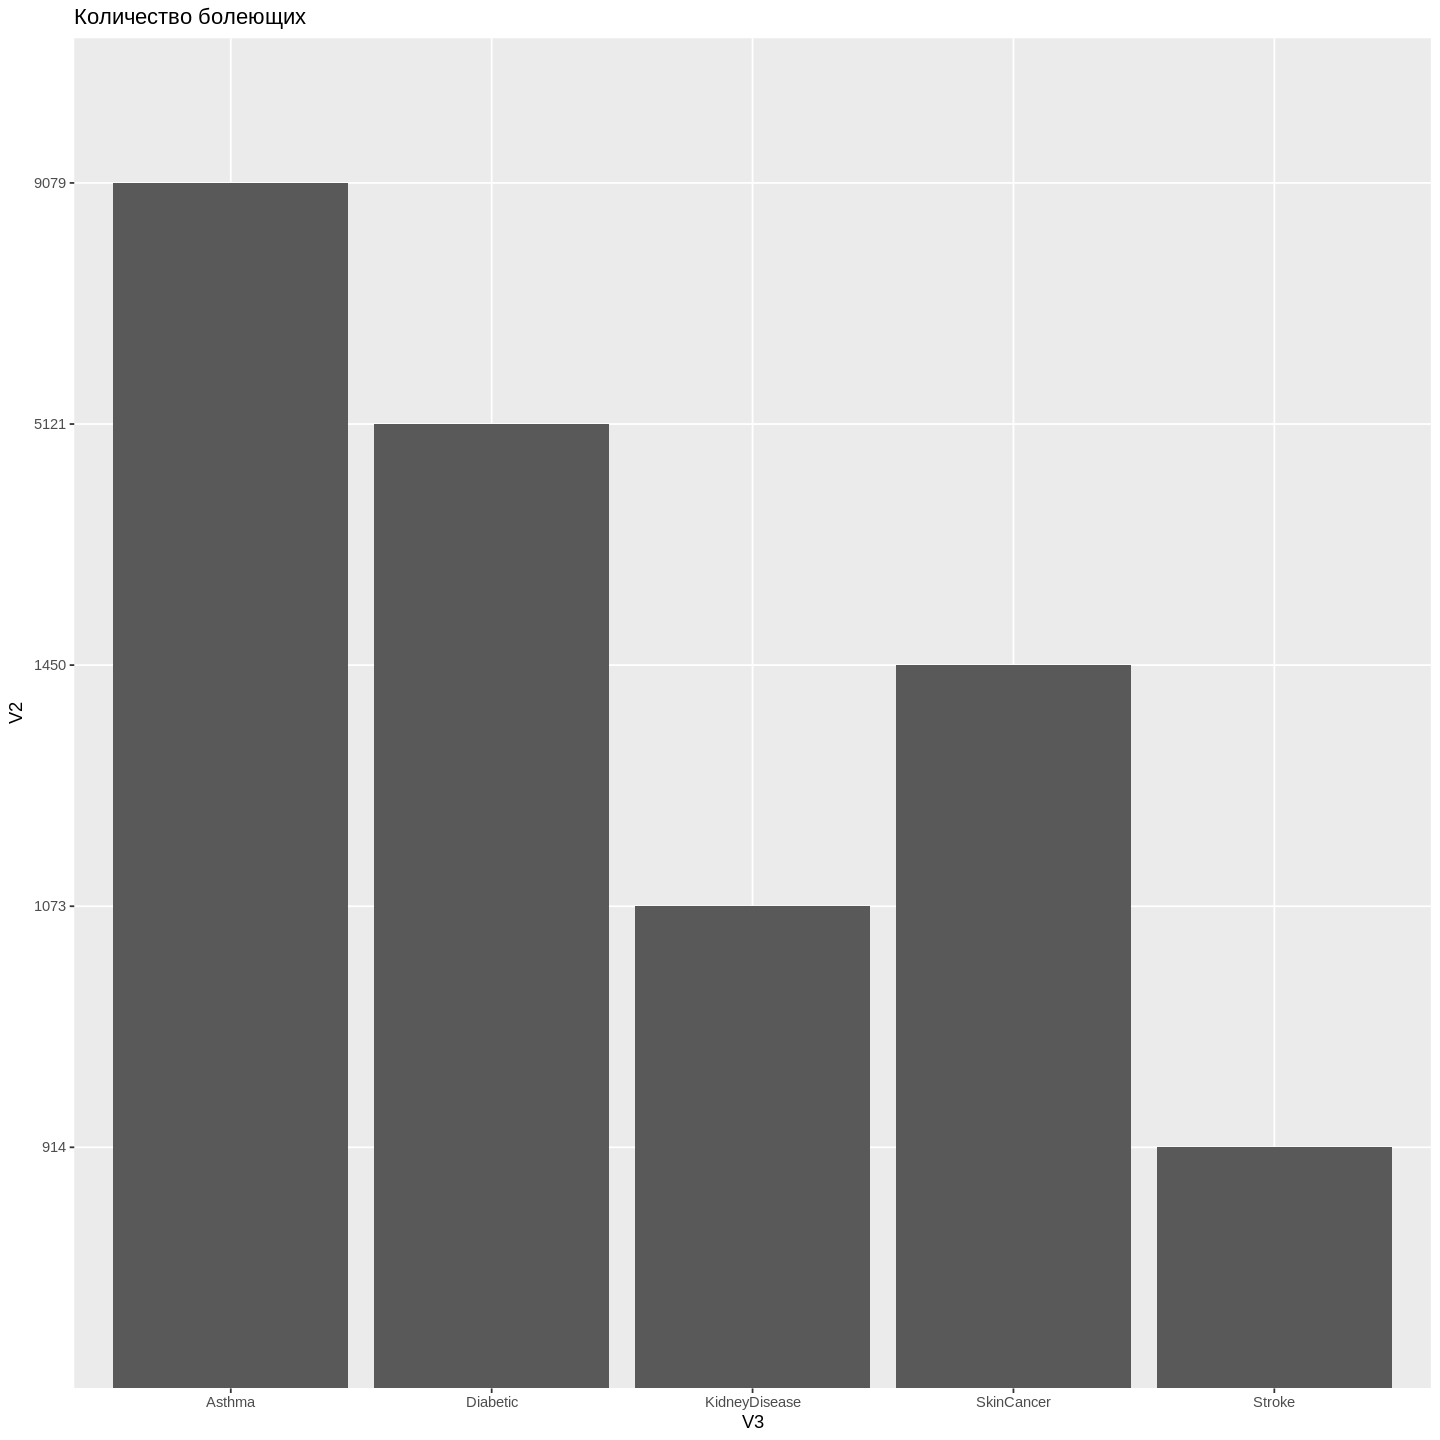

In [ ]:
ggplot(mid_dis, aes(y=V2, x=V3)) + 
    geom_bar(position="dodge", stat="identity") + ggtitle("Количество болеющих")

Гипотеза опроверглась: самой распространенной болезнью является не диабет, а астма.

#### Развитие рака кожи не зависит от количества сна, но зависит от расы

In [ ]:
df_cancer <- df[c("Race", "SkinCancer")]

In [ ]:
df_cancer_sleep <- df[c("SleepTime", "SkinCancer")]

In [ ]:
df_cancer_sleep$SkinCancer[df_cancer_sleep$SkinCancer == "No"] <- 0
df_cancer_sleep$SkinCancer[df_cancer_sleep$SkinCancer == "Yes"] <- 1
df_cancer_sleep$SkinCancer <- as.numeric(df_cancer_sleep$SkinCancer)

In [ ]:
df_cancer_sleep <- df_cancer_sleep %>% group_by(SleepTime) %>% summarise(count = sum(SkinCancer))

In [ ]:
df_cancer$SkinCancer[df_cancer$SkinCancer == "No"] <- 0
df_cancer$SkinCancer[df_cancer$SkinCancer == "Yes"] <- 1
df_cancer$SkinCancer <- as.numeric(df_cancer$SkinCancer)

In [ ]:
df_cancer <- df_cancer %>% group_by(Race) %>% summarise(count = sum(SkinCancer))

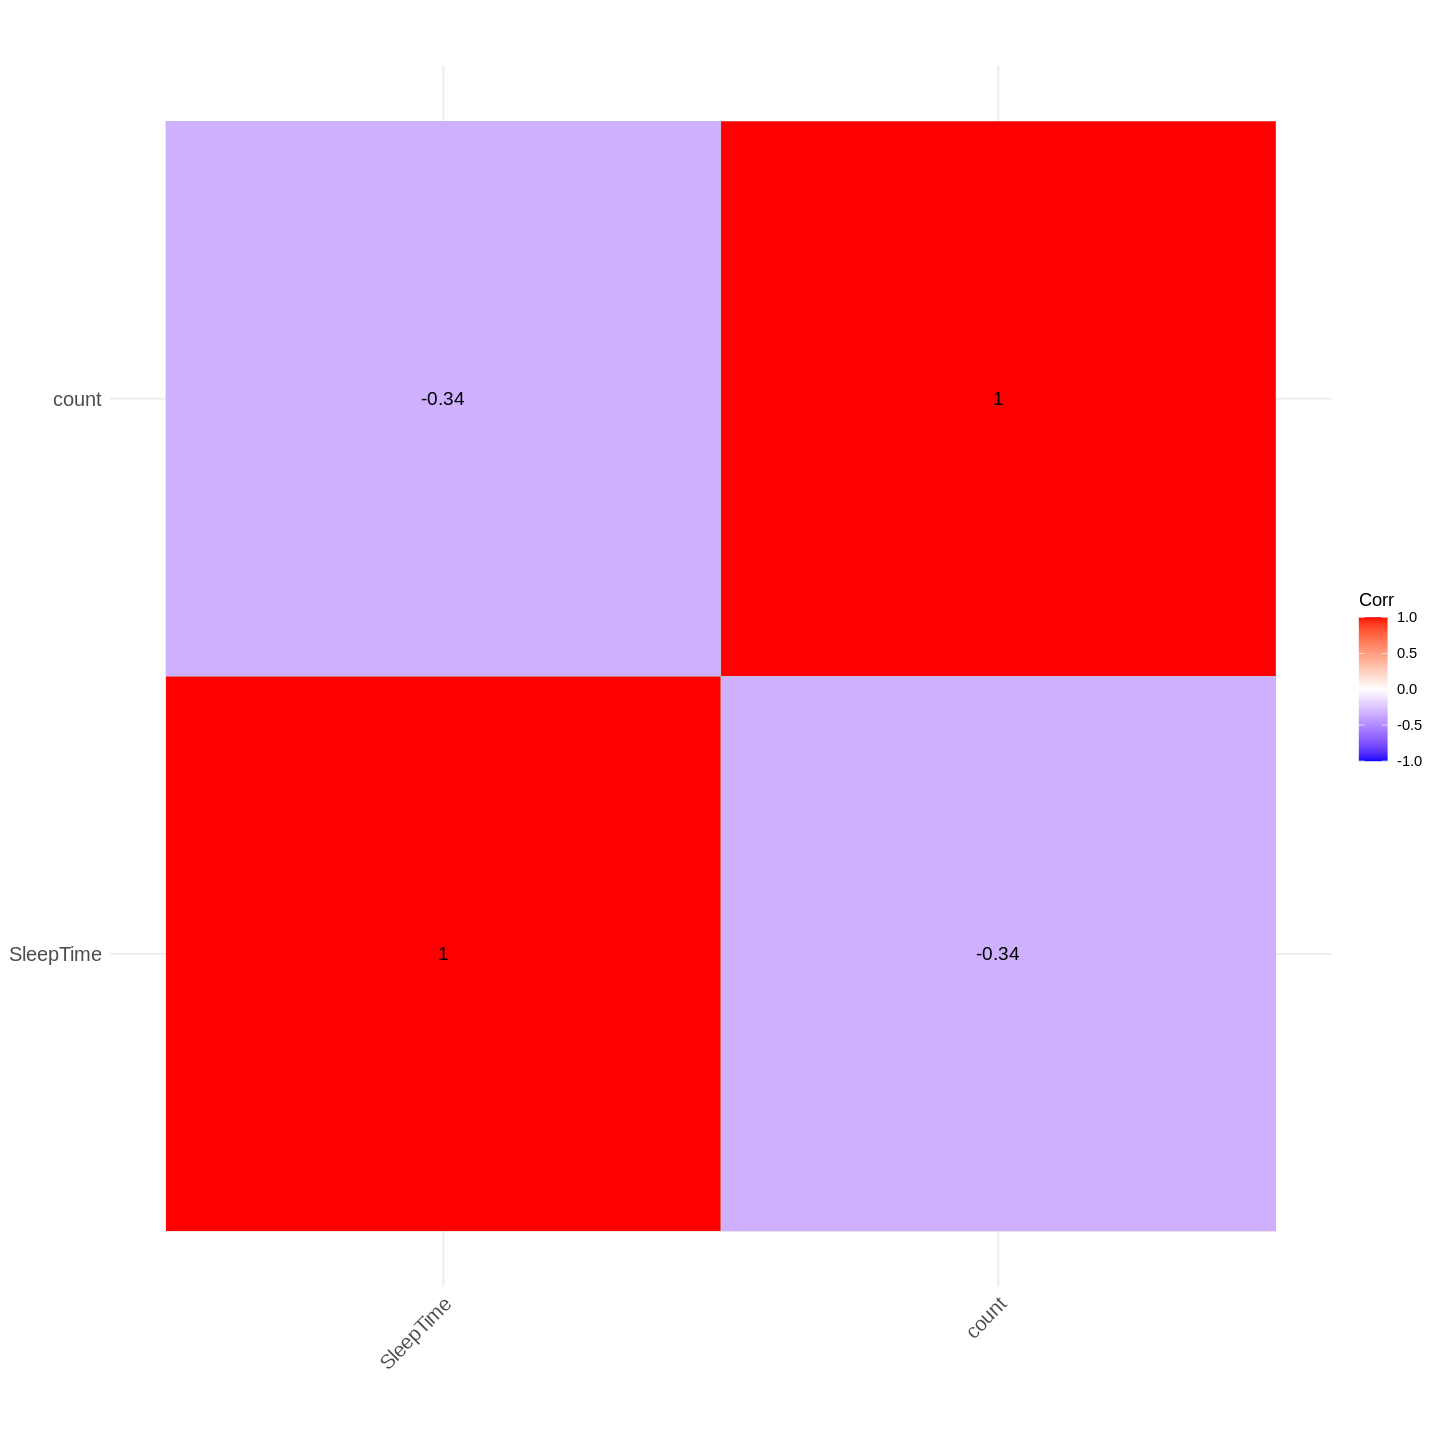

In [ ]:
ggcorrplot(cor(df_cancer_sleep), lab = TRUE)

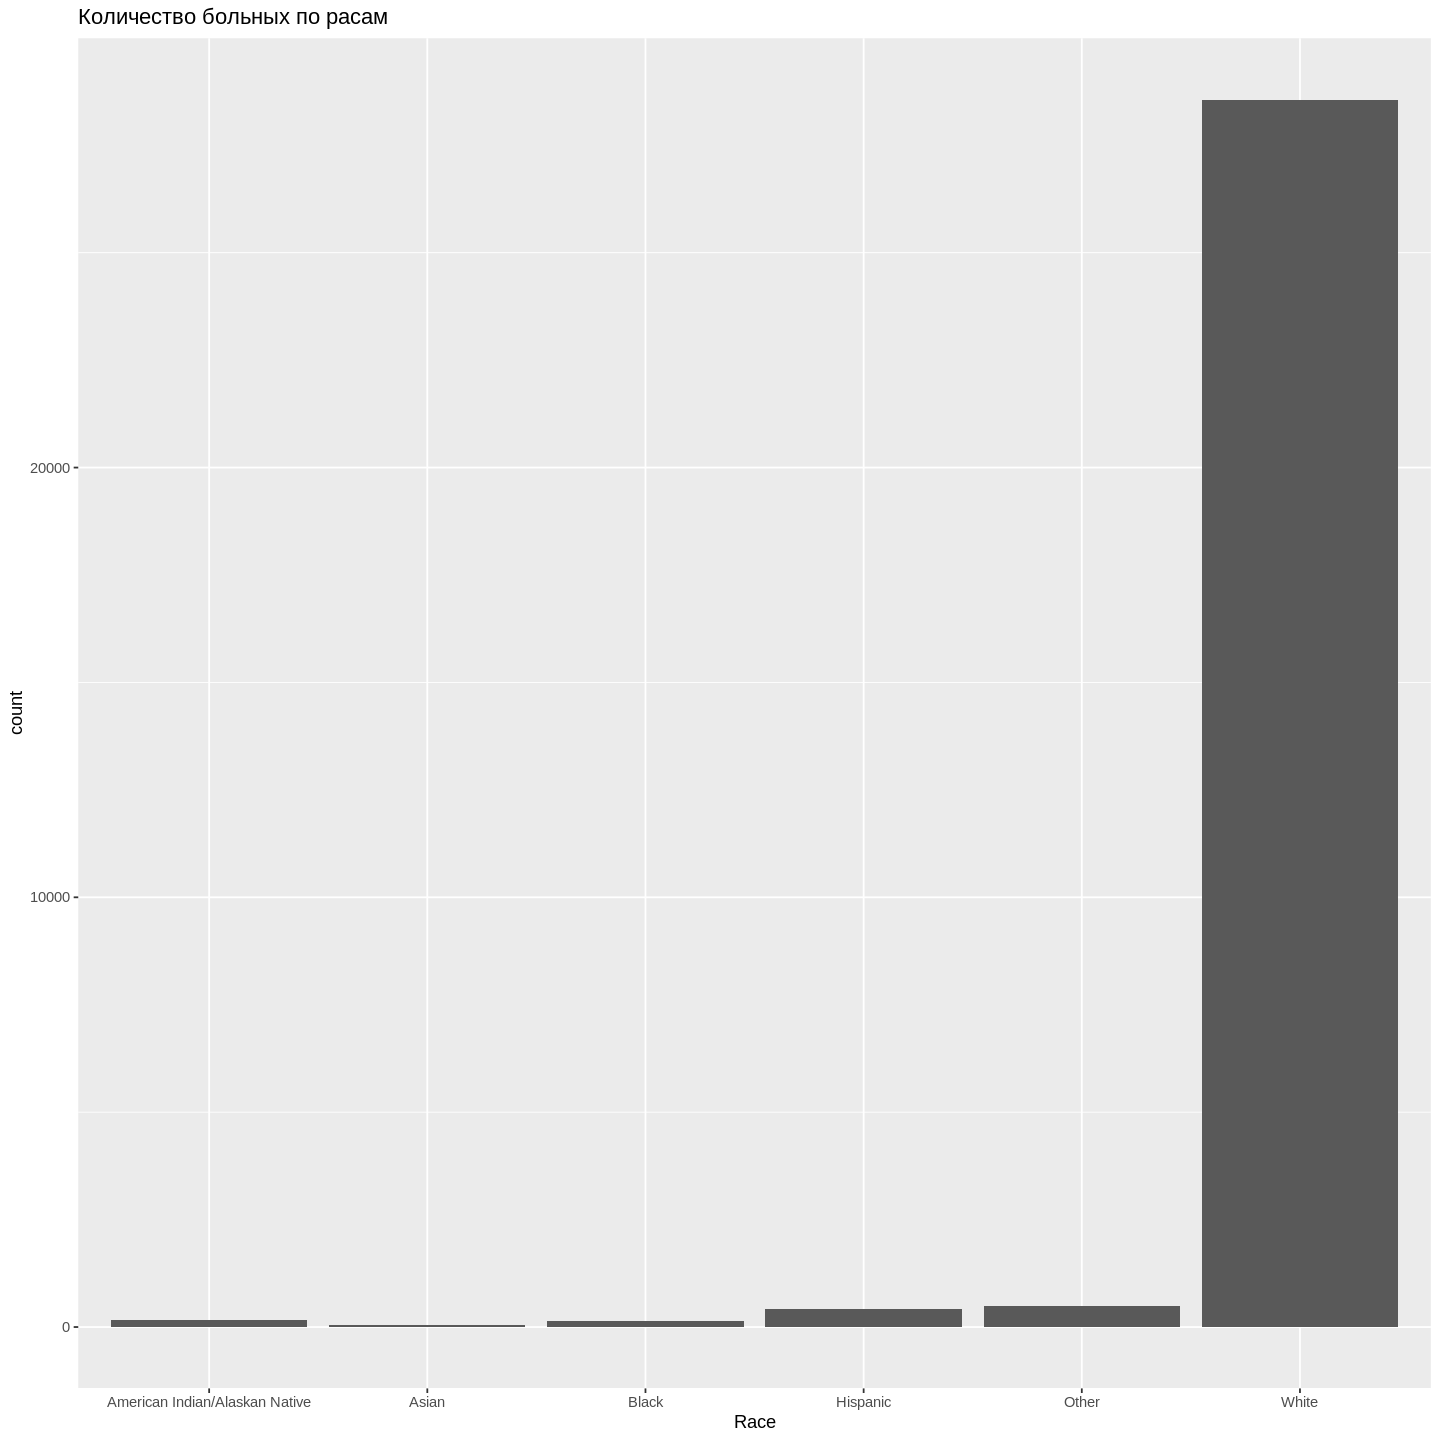

In [ ]:
ggplot(df_cancer, aes(y=count, x=Race)) + 
    geom_bar(position="dodge", stat="identity") + ggtitle("Количество больных по расам")

Гипотеза опроверглась: количество сна и наличие рака кожи имеет незначиельную отрицательную корреляцию, а распределение рака кожи по расам скорее говорит о невзвешенности датасета.

#### Чем выше BMI, тем вероятнее, что у человека диабет 

In [ ]:
diabet <- df

In [ ]:
diabet$Diabetic[df$Diabetic == "Yes (during pregnancy)"] <- "Yes"
diabet$Diabetic[df$Diabetic == "No, borderline diabetes"] <- "No"
diabet <- diabet %>% group_by(Diabetic) %>% summarise(bmi_mean = mean(BMI))

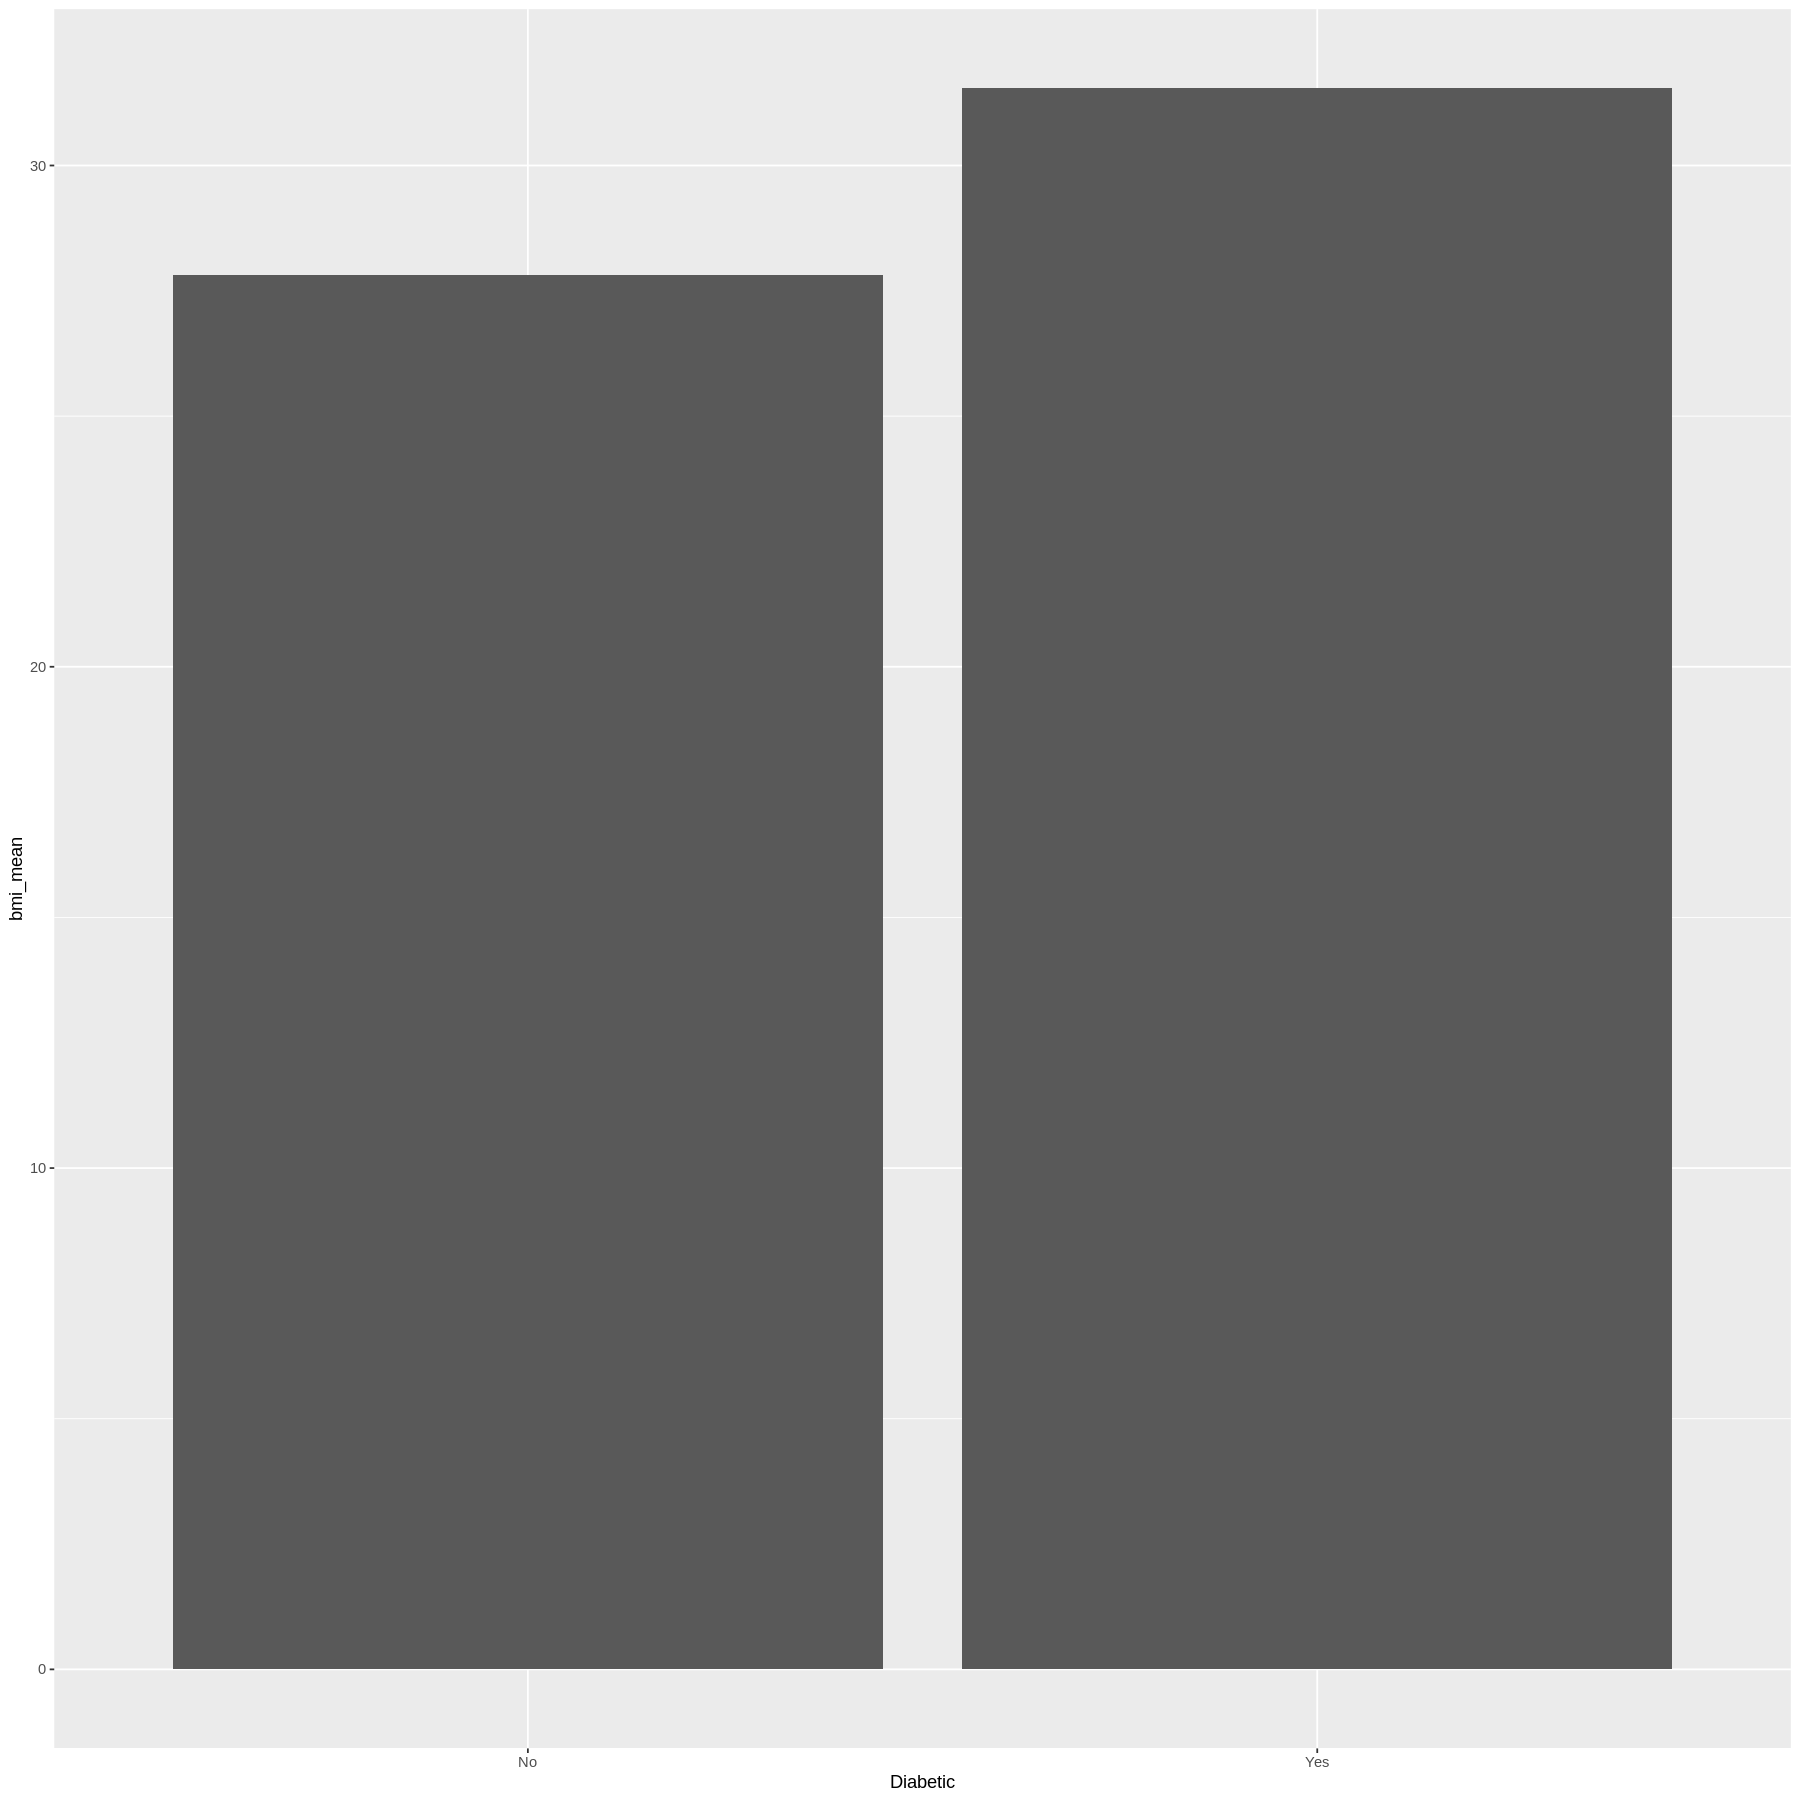

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)

ggplot(diabet, aes(y=bmi_mean, x=Diabetic)) + 
    geom_bar(position="dodge", stat="identity")

Гипотеза подтвердилась: на данной выборке среднеезначение индекса массы тела выше именно у людей, больных диабетом.

#### Среди женщин лучшие показатели здоровья у белых в возрасте 18 - 24

In [ ]:
fem <- filter(df, Sex == "Female")
fem <- group_by(fem, Race, AgeCategory)
fem <- summarize(fem, PhysicalHealth = mean(PhysicalHealth))

`summarise()` has grouped output by 'Race'. You can override using the
`.groups` argument.


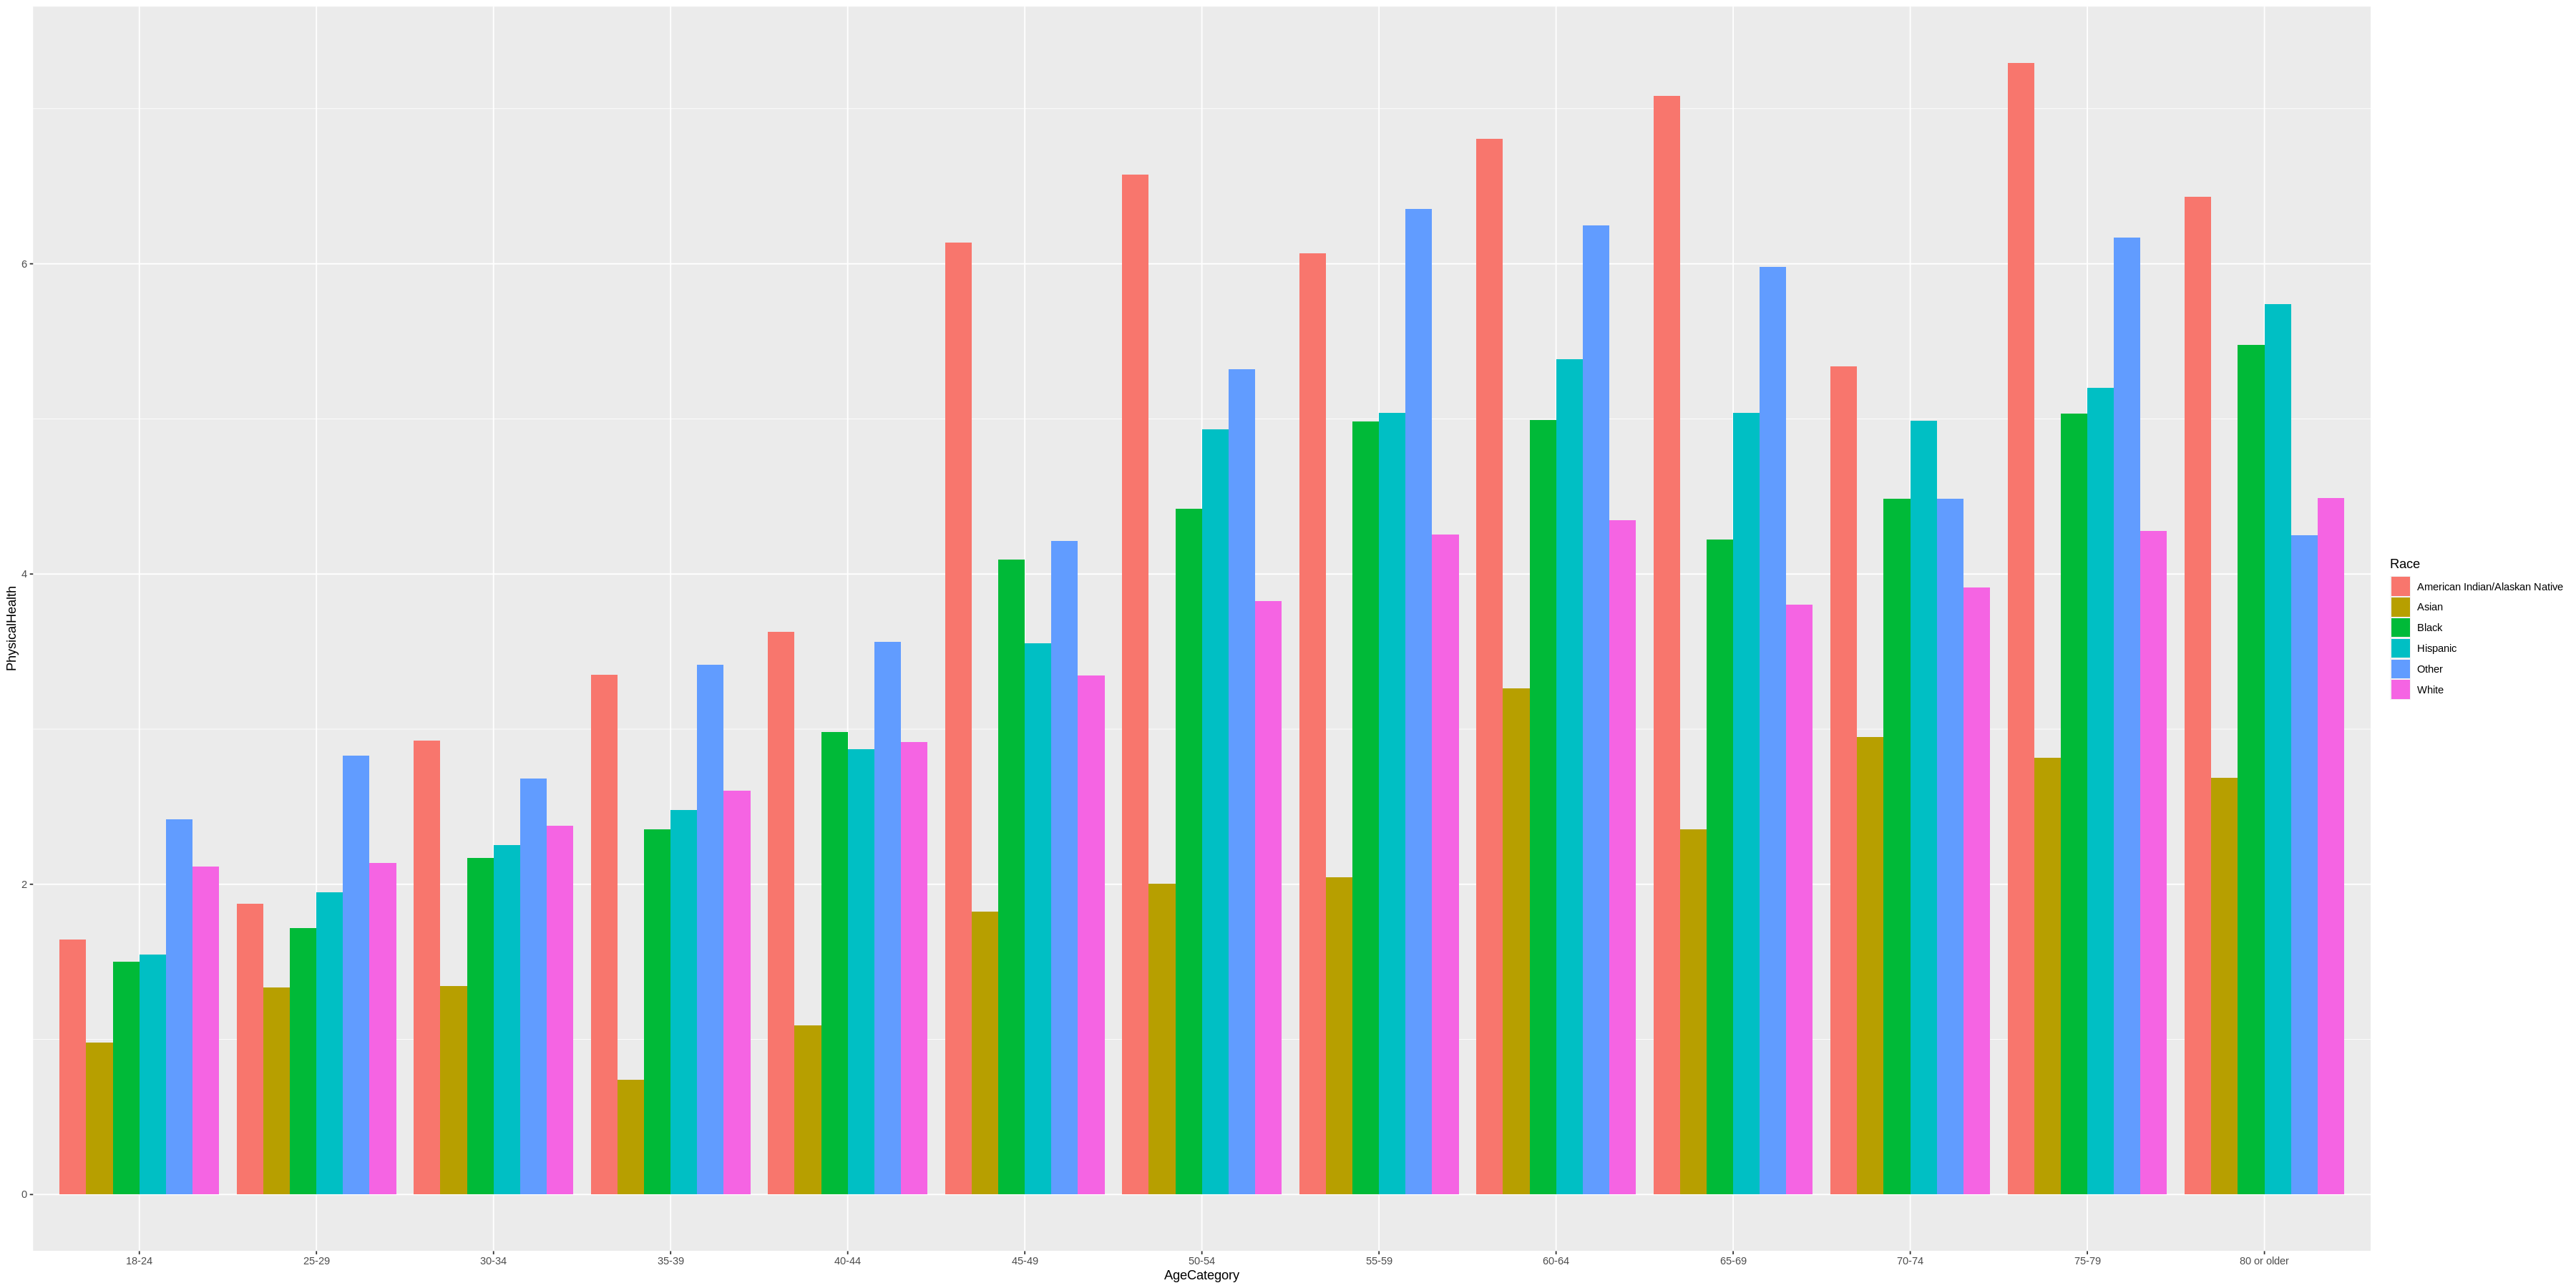

In [ ]:
options(repr.plot.width=30, repr.plot.height=15)

ggplot(fem, aes(fill=Race, y=PhysicalHealth, x=AgeCategory)) + 
    geom_bar(position="dodge", stat="identity")

Гипотеза опроверглась: судя по графику, лучший показатель здоровья у азиатских женщин в возрасте 35-39.

#### Параметр `DiffWalking` связан с параметрами `BMI` и `PhysicalActivity`

In [ ]:
df_walk <- df

df_walk$DiffWalking[df$DiffWalking == "Yes"] <- 1
df_walk$DiffWalking[df$DiffWalking == "No"] <- 0

df_walk$PhysicalActivity[df$PhysicalActivity == "Yes"] <- 1
df_walk$PhysicalActivity[df$PhysicalActivity == "No"] <- 0

df_walk$DiffWalking <- as.double(df_walk$DiffWalking)
df_walk$PhysicalActivity <- as.double(df_walk$PhysicalActivity)

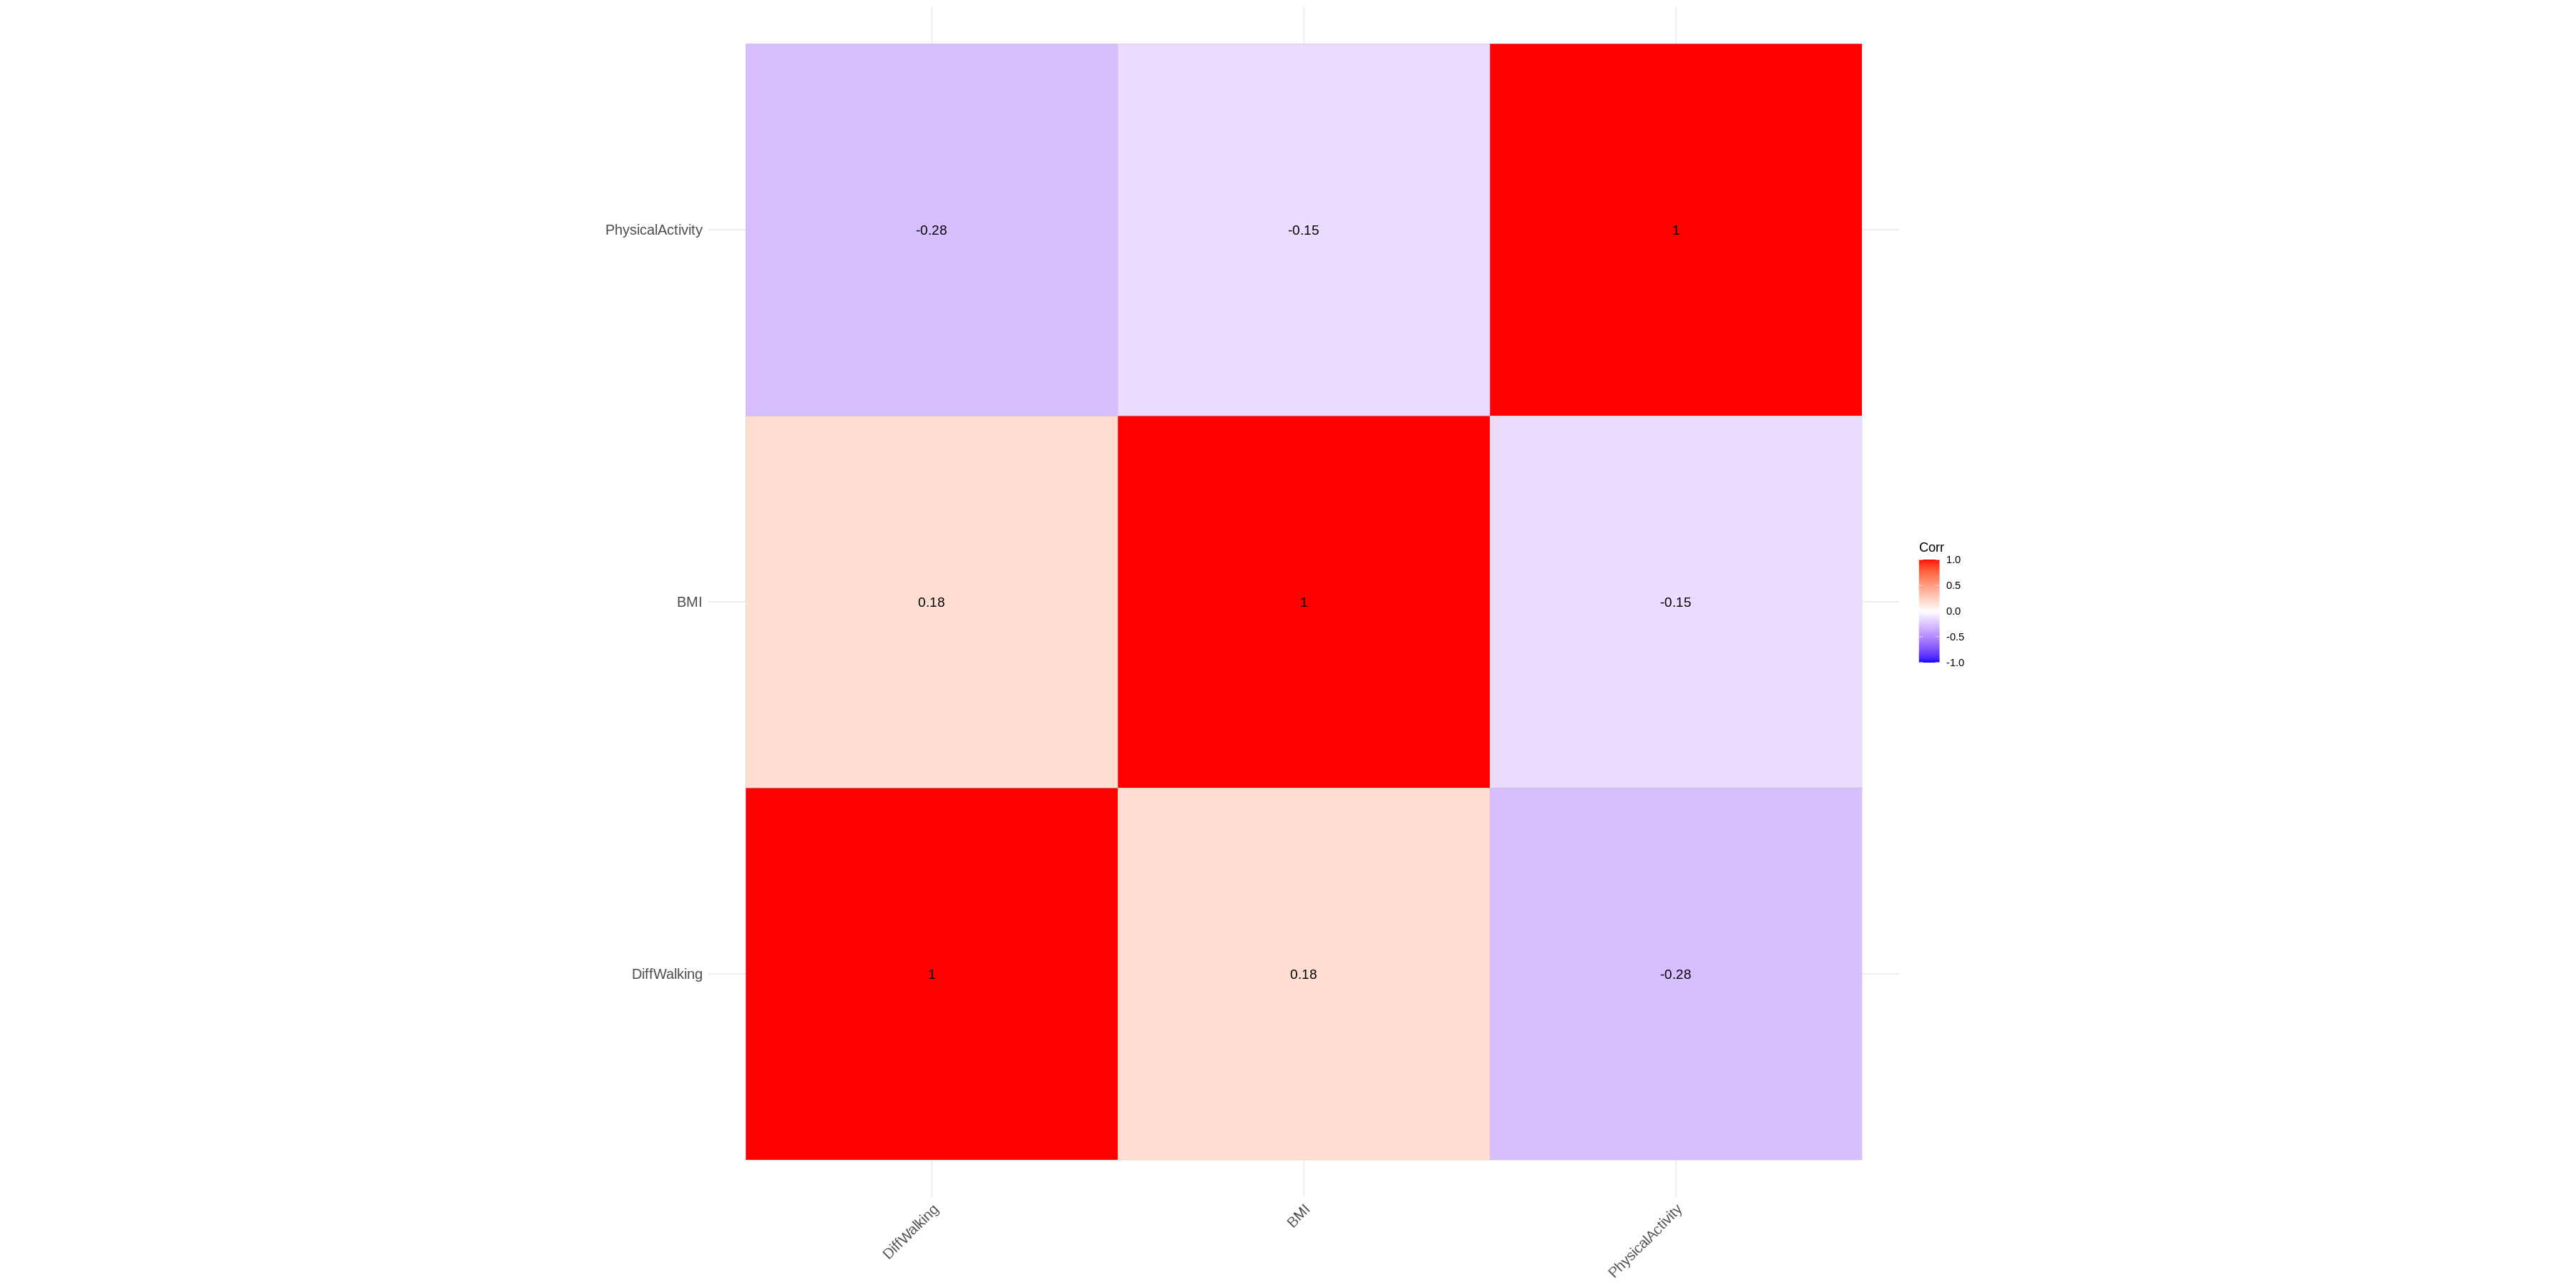

In [ ]:
ggcorrplot(cor(df_walk[c("DiffWalking", "BMI", "PhysicalActivity")]), lab = TRUE)

Гипотеза опроверглась: ни одна из корреляций не выглядит достаточно значимой.

#### Между наличием порока сердца и болезни почек нет прямой связи.

In [ ]:
df_heart <- df

df_heart$HeartDisease[df$HeartDisease == "Yes"] <- 1
df_heart$HeartDisease[df$HeartDisease == "No"] <- 0

df_heart$KidneyDisease[df$KidneyDisease == "Yes"] <- 1
df_heart$KidneyDisease[df$KidneyDisease == "No"] <- 0

In [ ]:
df_heart$HeartDisease <- as.double(df_heart$HeartDisease)
df_heart$KidneyDisease <- as.double(df_heart$KidneyDisease)

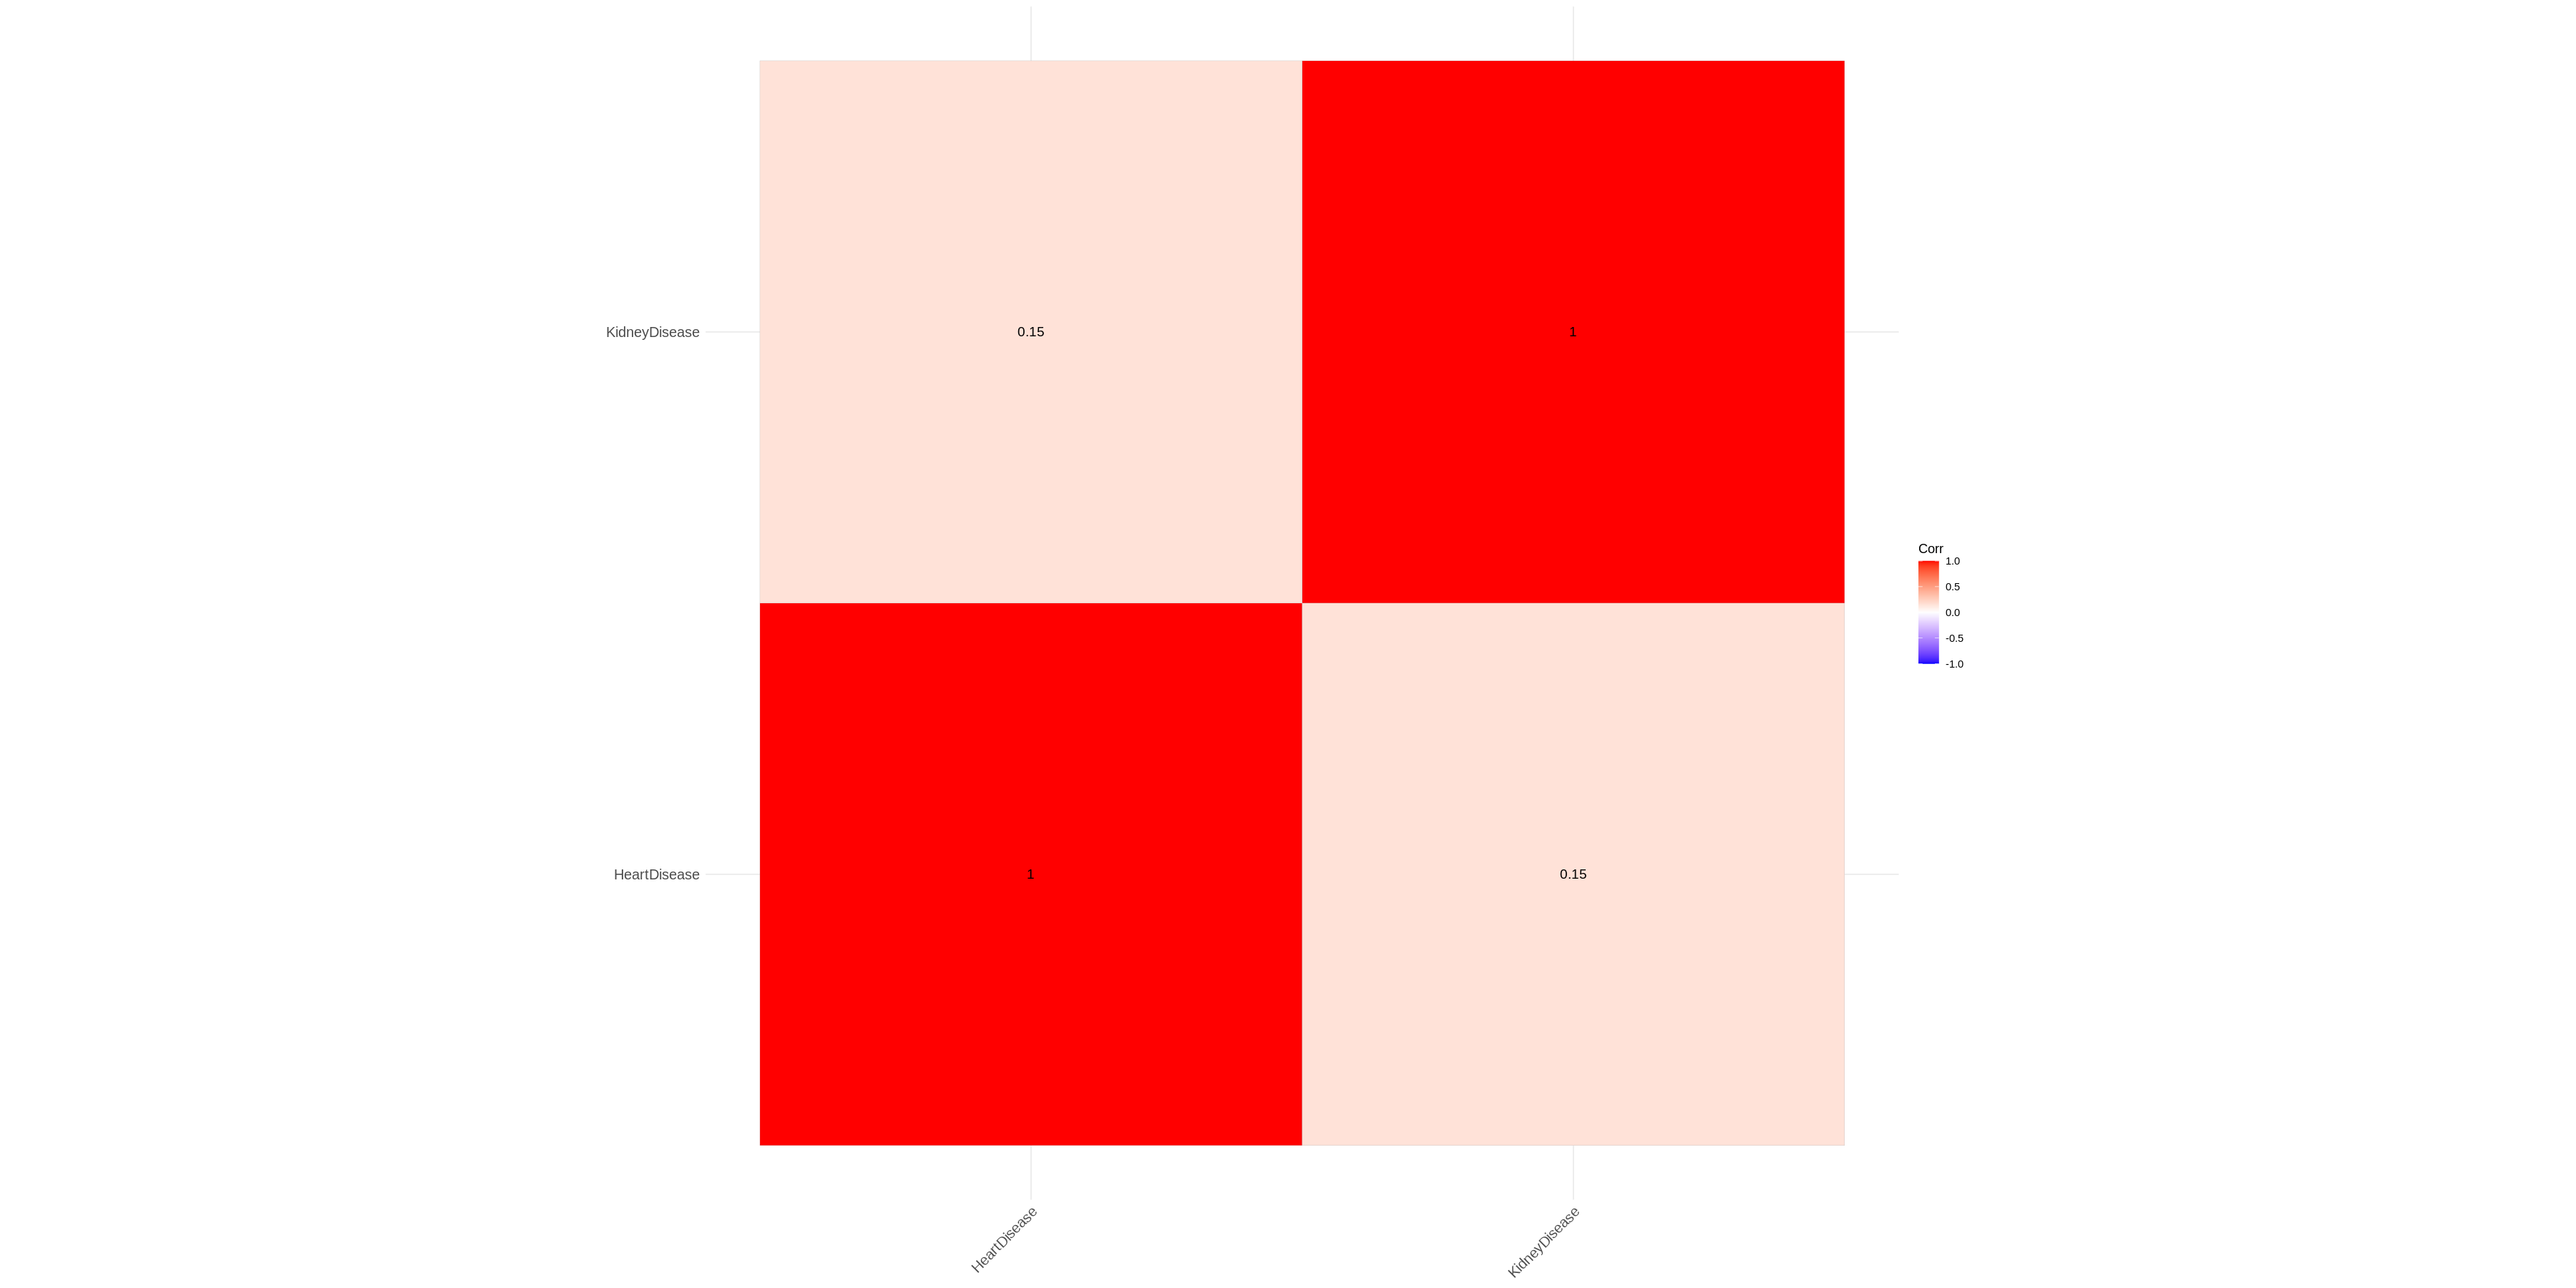

In [ ]:
ggcorrplot(cor(df_heart[c("HeartDisease", "KidneyDisease")]), lab = TRUE)

Гипотеза подвердилась: связь между этими параметрами слабая.